<a href="https://colab.research.google.com/github/zekzen/dataclub/blob/main/6_heart_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""
İU Data Klubu - Yapay Sinir Aglari Sunumu
07.04.2021
Author: Dr. Zeki Ozen

Dataset kaynagi: UCI Heart Disease-Cleveland @ Kaggle
Link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

Faydalanilan Notebook:  https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7

"""

'\nİU Data Klubu - Yapay Sinir Aglari Sunumu\n07.04.2021\nAuthor: Dr. Zeki Ozen\n\nDataset kaynagi: UCI Heart Disease-Cleveland @ Kaggle\nLink: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data\n\nFaydalanilan Notebook:  https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7\n\n'

In [3]:
import pandas as pd 
import numpy as np 

In [4]:
# verisetini yukluyoruz
data = pd.read_csv('https://raw.githubusercontent.com/zekzen/dataclub/main/heart.csv',  sep=',') 

In [5]:
data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
"""
•    age: yas
•    sex: cinsiyet (1 = erkek, 0 = kadin)
•    cp: Göğüs ağrısı tipi
•    trestbps: Dinlenme durumunda kan basıncı (tansiyon) (mm Hg hastaneye kabulde)
•    chol: kolesterol  (mg/dl)
•    fbs: Tokluk şekeri düzeyi (> 120 mg/dl, 1 = true; 0 = false)
•    restecg: Dinlenme durumunda Elektrokardiyografı düzeyi
•    thalach: Maksimum kalp atış ritim tipi
•    exang: Egzersiz ile oluşan göğüs ağrısı (1 = yes; 0 = no)
•    oldpeak: Dinlenme durumunda ST değeri ('ST' relates to positions on the ECG plot. See more here)
•    slope: Pik egzersiz durumunda ST segmentinin eğimi
•    ca: Büyük damarların sayısı (0-3)
•    thal: thalassemia tipi
•    target: Kalp hastalığı (0 = no, 1 = yes)



cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina
 
restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 
slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping
 
thal
Results of the blood flow observed via the radioactive dye.
 
Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

"""

In [8]:
# Bagimli ve bagimsiz degiskenlerimizi ayiralim
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
# hedef niteligik sinif sayilarina bakiliyor
print(y.value_counts())
print("Target Class Size:", y.value_counts("0"))

1    165
0    138
Name: target, dtype: int64
Target Class Size: 1    0.544554
0    0.455446
Name: target, dtype: float64


In [10]:
# Egitim ve test veri setlerimizi %70 egitim, %30 test olacak sekilde ayiralim
# Egitim ve test verisetinde sinif dagilimini korumasini stratify parametresi ile sagliyoruz
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3,  
                                                 # stratify=y, 
                                                  random_state = 42) 

In [11]:
print(y_train.value_counts("0"))
print(y_test.value_counts("0"))

1    0.542453
0    0.457547
Name: target, dtype: float64
1    0.549451
0    0.450549
Name: target, dtype: float64


In [12]:
#Bagimli nitelikleri Standart normalizasyon yontemiyle normalize ediyoruz
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#numerik degiskenler 
numerik_nit = ['age', 'trestbps', 'chol','thalach','oldpeak']
scaler=StandardScaler()
scaler.fit(X_train[numerik_nit])
X_train[numerik_nit] = scaler.transform(X_train[numerik_nit])
X_test[numerik_nit] = scaler.transform(X_test[numerik_nit])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [13]:
#bagimli kategorik degiskenler one-hot-encoding yontemi ile kategorik formata donusturuluyor
X_train = pd.get_dummies( X_train, columns= ['sex', 'cp',  'fbs',  'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
X_test = pd.get_dummies( X_test, columns= ['sex', 'cp',  'fbs',  'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [14]:
# ysa icin kullanacagimiz tenserflow ve keras kutuphanelerini 
# calisma ortamimiza dahil edelim
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import confusion_matrix

In [15]:
# Cok katmanli modelimizin mimarisini yapilandiriyoruz
# 22-15-10-1 katmandaki noron sayilarimiz
classifier = Sequential()

# girdi katmanimiz yapilandiriliyor
classifier.add(Dense(activation = "relu",
                     input_dim = X_train.shape[1],
                     units = 15, 
                     kernel_initializer = "uniform")) 

# gizli katmanimiz yapilandiriliyor
classifier.add(Dense(activation = "relu", 
                     units = 10,
                     kernel_initializer = "uniform"))  # kernel_initializer = "normal"

# cikti katmanimiz yapilandiriliyor
classifier.add(Dense(activation = "sigmoid", 
                     units = 1, # burasinin 1 olmasi muhim
                     kernel_initializer = "uniform")) 

# model olusturuluyor
classifier.compile(optimizer = 'adam' , 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] ) 

In [16]:
#############################
# modelimizi egitelim       #
#############################

output = classifier.fit(X_train, y_train, 
               batch_size = 8,
               epochs = 100,
               validation_split=0.2,
               )

Epoch 1/100
22/22 [==============================] - 1s 27ms/step - loss: 0.6929 - accuracy: 0.5769 - val_loss: 0.6922 - val_accuracy: 0.5116
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5479 - val_loss: 0.6890 - val_accuracy: 0.5116
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5969 - val_loss: 0.6780 - val_accuracy: 0.7674
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.7713 - val_loss: 0.6526 - val_accuracy: 0.7209
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.7822 - val_loss: 0.6166 - val_accuracy: 0.7442
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5473 - accuracy: 0.8421 - val_loss: 0.5786 - val_accuracy: 0.7442
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.7274 - val_loss: 0.5462 - val_accuracy: 0.7209
Epoch 8/100


In [17]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                345       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 516
Trainable params: 516
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#############################
# Ve modelimizi test edelim #
#############################

In [19]:
#Egitim veri setinin basarimi
pred_train = classifier.predict(X_train)
scores_train_pred = classifier.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores_train_pred[1], 1 - scores_train_pred[1]))

Accuracy on training data: 0.8915094137191772% 
 Error on training data: 0.10849058628082275


In [20]:
#Test veri setinin basarimi
y_pred = classifier.predict(X_test)
print(y_pred)

[[4.0848404e-02]
 [5.0531721e-01]
 [8.7457812e-01]
 [1.6941756e-02]
 [8.0256677e-01]
 [9.9762911e-01]
 [6.6745526e-01]
 [4.7127306e-03]
 [5.7258904e-03]
 [3.1296313e-01]
 [9.1565871e-01]
 [2.3490071e-02]
 [9.5111930e-01]
 [9.7685158e-03]
 [9.8233396e-01]
 [9.9435794e-01]
 [9.9883825e-01]
 [1.4785826e-02]
 [4.0299296e-03]
 [1.6714036e-03]
 [2.1025807e-01]
 [9.5859855e-02]
 [7.7147192e-01]
 [7.9765481e-01]
 [9.5452881e-01]
 [9.8238075e-01]
 [8.5750723e-01]
 [7.6634455e-01]
 [2.8008968e-02]
 [8.5627902e-01]
 [1.7399132e-02]
 [9.9290907e-03]
 [8.2927644e-03]
 [1.5342116e-02]
 [9.3167746e-01]
 [1.4894694e-02]
 [9.6196449e-01]
 [9.4593233e-01]
 [2.7010521e-01]
 [9.0712953e-01]
 [9.9860823e-01]
 [8.2000935e-01]
 [8.0785215e-01]
 [8.6344266e-01]
 [9.1741908e-01]
 [1.0948101e-01]
 [6.6342741e-02]
 [9.9211264e-01]
 [3.1805247e-02]
 [4.2032599e-03]
 [8.8015556e-02]
 [8.4045529e-03]
 [9.5697618e-01]
 [9.2700493e-01]
 [1.9202110e-01]
 [1.5139282e-03]
 [1.9102275e-02]
 [9.9216425e-01]
 [7.0130229e-0

In [21]:
scores_y_pred = classifier.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores_y_pred[1], 1 - scores_y_pred[1]))

Accuracy on test data: 0.8131868243217468% 
 Error on test data: 0.18681317567825317


In [22]:
#Orneklerin bulunma olasiliklarini >  0.5 ise 1, degilse 0 olarak kodluyoruz
#y_pred = y_pred.round().astype(int)
y_pred = (y_pred >= 0.5).astype(int)
print(y_pred)

[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]


In [23]:
conf_matrix = confusion_matrix(y_test, y_pred) 
print(conf_matrix)

[[34  7]
 [10 40]]


In [24]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [25]:
print(accuracy_score(y_test, y_pred))

0.8131868131868132


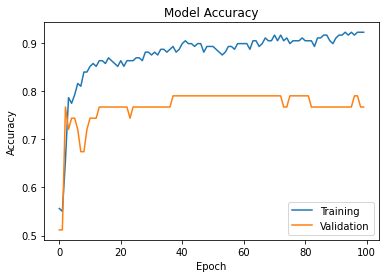

In [26]:
# epoch iterasyonuna gore egitim ve test veri setlerinin dogruluk grafigi
import matplotlib.pyplot as plt
plt.plot(output.history['accuracy'])
plt.plot(output.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
#plt.savefig('Accuracy.png',dpi=100)
plt.show()